# Color Threshold, Blue Screen

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read And Display Image

In [2]:
# Read Input Image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Image type and dimensions
print(f"Image is : {type(image)} having dimensions : {image.shape}")

Image is : <class 'numpy.ndarray'> having dimensions : (514, 816, 3)


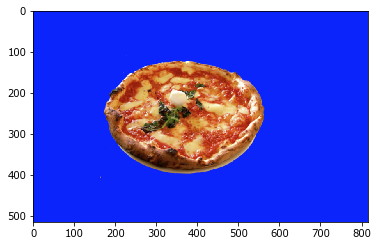

In [3]:
# Copy Of Image
image_copy = np.copy(image)

# Change color from BGR to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the RGB Image
plt.imshow(image_copy)

## Defining the color threshold 

In [4]:
lower_blue = np.array([0,0,220]) 
upper_blue = np.array([50,70,255])

## Create a mask

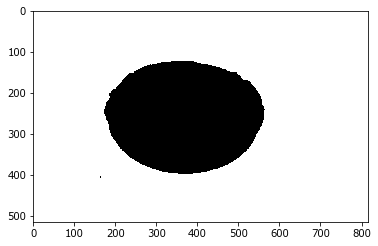

In [6]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Visualize the mask
plt.imshow(mask, cmap = "gray")

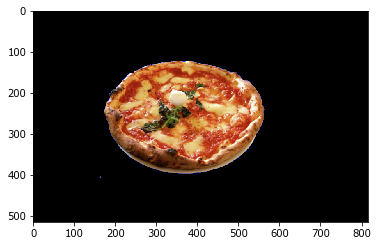

In [7]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)
masked_image[mask!=0] = [0, 0, 0]

# Display masked image
plt.imshow(masked_image)

## Mask and add a background image

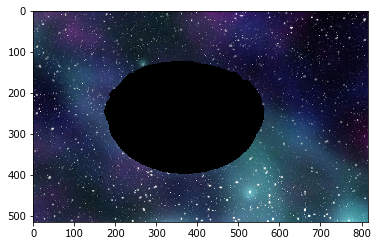

In [9]:
# Load in Input Image and convert it to RGB
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop to right size
crop_bg = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_bg[mask==0] = [0, 0, 0]

# Display Background
plt.imshow(crop_bg)

## Create Complete Image

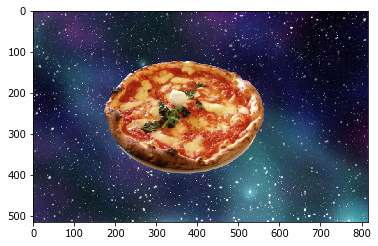

In [10]:
# Add the images together to create a complete image
out = crop_bg + masked_image

# Display Result
plt.imshow(out)